## 5. Linear Regression with PyTorch

### 1. About Linear Regression
#### 1.1 Simple Linear Regression Basics
* Allows us to understand the relationship between two continuous variables
* Example
    * x: independent variable
        * weight
    * y: dependent variable
        * height
* $y=\alpha x+\beta$

#### 1.2 Example of Simple Linear Regression

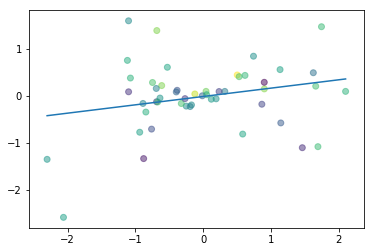

In [3]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1)
n = 50
x = np.random.randn(n)
y = x*np.random.randn(n)

colors = np.random.randn(n)
plt.plot(np.unique(x), np.poly1d(np.polyfit(x,y,1))(np.unique(x)))

plt.scatter(x,y,c=colors, alpha=0.5)
plt.show()

#### 1.3 Aim of Linear Regression
* Minimize the distance between the points and the line ($y=\alpha x+\beta$)
* Adjusting
    * Coefficient: $\alpha$
    * Bias / Intercept: $\beta$

### 2. Building a Linear Regression Model with PyTorch

#### 2.1 Example
* Coefficient: $\alpha$
* Bias / Intercept: $\beta$
* Equation: $y=2x+1$

#### 2.2 Building a Toy Dataset

In [4]:
x_values = [i for i in range(11)]

In [5]:
x_values

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [6]:
# Convert to numpy
x_train = np.array(x_values, dtype=np.float32)
x_train.shape

(11,)

In [7]:
# IMPORTANT - 2D REQUIRED
x_train = x_train.reshape(-1, 1)
x_train.shape

(11, 1)

$y=2x+1$

In [10]:
y_values = [2 * i + 1 for i in x_values]   # list comprehensions - cool.
y_values

[1, 3, 5, 7, 9, 11, 13, 15, 17, 19, 21]

In [11]:
#Note the above was returned as a list, due to the list comp. We need it to be a numpy array, same as x_values
y_train = np.array(y_values, dtype=np.float32)
y_train = y_train.reshape(-1, 1)
y_train.shape

(11, 1)

#### 2.3 Building the Model

#### Critical Imports

In [13]:
import torch
import torch.nn as nn
from torch.autograd import Variable

#### Create Model

1. Linear Model
    * True Equation: $y=2x+1$
2. Forward
    * Example
        * Input $x=1$
        * Output $\hat y=?$

In [18]:
# Create a class for our model, in this case Linear Regression. This is the method we'll use for all models

class LinearRegressionModel(nn.Module):  #pass in nn.Module will be how every model is created.
    def __init__(self, input_size, output_size):
        super(LinearRegressionModel, self).__init__()
        self.Linear = nn.Linear(input_dim, output_dim)
        
    def forward(self, x):        #forward is also a standard function for every model
        out = self.Linear(x)
        return out

#### Instantiate Model Class

* input: [0,1,2,3,4,5,6,7,8,9,10]
* output: [1,3,5,7,9,11,13,15,17,19,21]

In [19]:
input_dim = 1
output_dim = 1

model = LinearRegressionModel(input_dim, output_dim)

#### Instantiate Loss Class
* MSE Loss: Mean Squared Error
* $MSE=\frac 1n \sum_{i=0}^n (\hat y_i -y_i)$
* $\hat y$: prediction
* $y$: true value

In [20]:
criterion = nn.MSELoss()  #"criterion" is a commonly used term in PyTorch

#### Instantiate Optimizer Class
* Simplified Equation
    * $\theta = \theta - \eta \cdot \nabla_\theta$
        * $\theta$: Parameters (our variables)
        * $\eta$: Learning Rate
        * $\nabla_\theta$: Our Parameters' Gradients
* Even Simpler Equation
    * parameters = parameters - learning rate * parameters' gradients
        * parameters: $\alpha$ and $\beta$ in $y=\alpha x + \beta$
        * desired parameters: $\alpha =2$ and $\beta = 1$ i.e. $y=2x+1$

In [22]:
learning_rate = 0.01

optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)

#### Train Model
* 1 epoch: going through entire x_train data once.
    * 100 epochs
        * 100x mapping x_train = [0,1,2,3,4,5,6,7,8,9,10]
    * Process
        1. Convert inputs/labels to variables
        - Clear gradient buffets (buffers?)
        - Get output given inputs
        - Get loss
        - Get gradients w.r.t. parameters
        - Update parameters using gradients
            * parameters = parameters - learning rate * parameters' gradients
        - REPEAT

In [23]:
epochs = 100

In [24]:
for epoch in range(epochs):
    epoch += 1
    # Convert numpy array to torch Variable
    inputs = Variable(torch.from_numpy(x_train))
    labels = Variable(torch.from_numpy(y_train))
    
    # Clear gradients w.r.t parameters
    optimizer.zero_grad()
    
    # Forward to get output
    outputs = model(inputs)
    
    # Calculate Loss
    loss = criterion(outputs, labels)
    
    # Getting gradients w.r.t. parameters
    loss.backward()
    
    # Updating parametsrs
    optimizer.step()
    
    print('epoch {}, loss {}'.format(epoch, loss.data[0]))

epoch 1, loss 265.86517333984375
epoch 2, loss 21.690467834472656
epoch 3, loss 1.773850917816162
epoch 4, loss 0.14926375448703766
epoch 5, loss 0.016700292006134987
epoch 6, loss 0.005837008822709322
epoch 7, loss 0.004900985397398472
epoch 8, loss 0.004775174427777529
epoch 9, loss 0.00471606245264411
epoch 10, loss 0.004662927705794573
epoch 11, loss 0.004610832314938307
epoch 12, loss 0.004559353459626436
epoch 13, loss 0.004508403595536947
epoch 14, loss 0.0044580791145563126
epoch 15, loss 0.004408308304846287
epoch 16, loss 0.00435905484482646
epoch 17, loss 0.0043103923089802265
epoch 18, loss 0.004262238275259733
epoch 19, loss 0.0042146616615355015
epoch 20, loss 0.0041675809770822525
epoch 21, loss 0.004121062811464071
epoch 22, loss 0.004075036849826574
epoch 23, loss 0.004029542673379183
epoch 24, loss 0.003984521608799696
epoch 25, loss 0.003940045367926359
epoch 26, loss 0.003896050387993455
epoch 27, loss 0.003852531313896179
epoch 28, loss 0.003809513757005334
epoch 2

#### Compare Data

In [25]:
# Purely inference
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()
predicted

array([[  1.07663405],
       [  3.06559801],
       [  5.05456209],
       [  7.0435257 ],
       [  9.03248978],
       [ 11.02145386],
       [ 13.01041794],
       [ 14.99938202],
       [ 16.9883461 ],
       [ 18.97730827],
       [ 20.96627235]], dtype=float32)

In [27]:
# y = 2x+1
y_train

array([[  1.],
       [  3.],
       [  5.],
       [  7.],
       [  9.],
       [ 11.],
       [ 13.],
       [ 15.],
       [ 17.],
       [ 19.],
       [ 21.]], dtype=float32)

#### Plot Graph

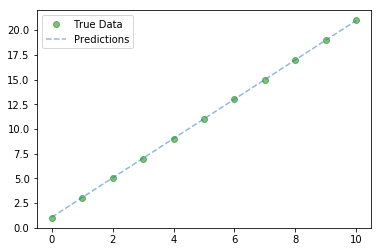

In [29]:
# Clear figure
plt.clf()

# Get Predictions
predicted = model(Variable(torch.from_numpy(x_train))).data.numpy()

# Plot true data
plt.plot(x_train, y_train, 'go', label='True Data', alpha=0.5)

# Plot predictions
plt.plot(x_train, predicted, '--', label='Predictions', alpha=0.5)

# Legend and plot
plt.legend(loc='best')
plt.show()

#### Save the Model

In [30]:
save_model = False # I don't wish to actually save this particular model, but it's good practice to save the parameters after running a model
if save_model:
    # Saves only parameters, namely alpha & beta
    torch.save(model.state_dict(), 'awesome_model.pkl')    

#### Load Previously Saved Model

In [31]:
load_model = False # See above
if load_model:
    model.load_state_dict(torch.load('awesome_model.pkl'))